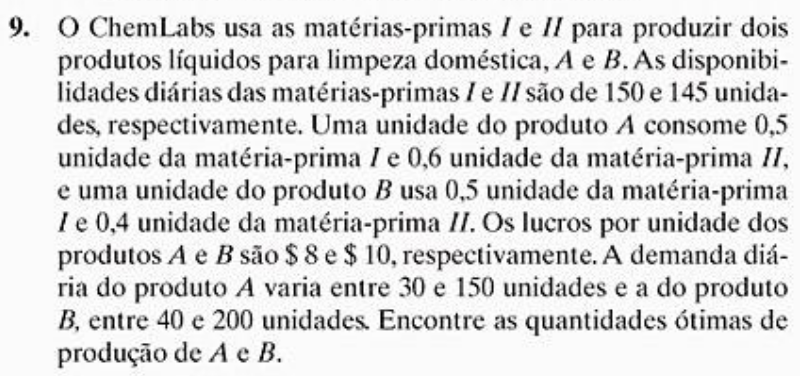

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Producao_Otima_ChemLabs')

In [3]:
# --- Parâmetros extraídos do enunciado ---

# Nomes dos produtos e matérias-primas para referência
produtos = ['A', 'B']
materias_primas = ['I', 'II']

# Dados financeiros
lucro_por_unidade = {'A': 8, 'B': 10}

# Disponibilidade diária de matérias-primas
disponibilidade_mp = {'I': 150, 'II': 145}

# Consumo de matéria-prima por unidade de produto
# Estrutura: consumo_mp[produto][materia_prima]
consumo_mp = {
    'A': {'I': 0.5, 'II': 0.6},
    'B': {'I': 0.5, 'II': 0.4}
}

# Limites de demanda diária
demanda_minima = {'A': 30, 'B': 40}
demanda_maxima = {'A': 150, 'B': 200}

In [4]:
# 1. Variáveis de Decisão
# Quantidade a produzir de cada produto
qtd = model.continuous_var_dict(produtos, name='Qtd')


# 2. Função Objetivo
# Maximizar o lucro total
expressao_lucro = (lucro_por_unidade[p] * qtd[p] for p in produtos)
soma_lucro_total = model.sum(expressao_lucro)
model.maximize(soma_lucro_total)


# 3. Restrições

# Restrições de Matéria-Prima (uma para cada tipo)
for mp in materias_primas:
    expressao_consumo = (consumo_mp[p][mp] * qtd[p] for p in produtos)
    soma_consumo = model.sum(expressao_consumo)
    restr_mp_logica = soma_consumo <= disponibilidade_mp[mp]
    model.add_constraint(restr_mp_logica, ctname=f'limite_mp_{mp}')

# Restrições de Demanda (mínima e máxima para cada produto)
for p in produtos:
    # Restrição de demanda mínima
    restr_demanda_min_logica = qtd[p] >= demanda_minima[p]
    model.add_constraint(restr_demanda_min_logica, ctname=f'demanda_min_{p}')

    # Restrição de demanda máxima
    restr_demanda_max_logica = qtd[p] <= demanda_maxima[p]
    model.add_constraint(restr_demanda_max_logica, ctname=f'demanda_max_{p}')

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Tried aggregator 1 time.
LP Presolve eliminated 4 rows and 0 columns.
Reduced LP has 2 rows, 2 columns, and 4 nonzeros.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =          2800.000000

------ SOLUÇÃO ÓTIMA ------

solution for: Producao_Otima_ChemLabs
objective: 2800
status: OPTIMAL_SOLUTION(2)
Qtd_A=100.000
Qtd_B=200.000

